# Data Visualization Notebook

## Objectives

*   Answer business requirement 1: 
    * The client is interested to have a study to visually differentiate a parasitized and uninfected cell.


## Inputs

* inputs/malaria_dataset/cell_images/train
* inputs/malaria_dataset/cell_images/test
* inputs/malaria_dataset/cell_images/validation

## Outputs

* Image shape embeddings pickle file.
* Mean and variability of images per label plot.
* Plot to distinguish the contrast between parasite-contained and uninfected cell images.
* Generate code that answers business requirement 1 and can be used to build an image montage on the Streamlit dashboard.


## Additional Comments | Insights | Conclusions




---

# Set Data Directory

---

## Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

## Set working directory

In [2]:
cwd= os.getcwd()

In [3]:
os.chdir('/workspaces/WalkthroughProject01')
print("You set a new current directory")

You set a new current directory


In [4]:

work_dir = os.getcwd()
work_dir

'/workspaces/WalkthroughProject01'

## Set input directories

Set train, validation and test paths.

In [5]:
my_data_dir = 'inputs/malaria_dataset/cell_images'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

# The purpose of this code block is to set the output directory path and ensure that a version-specific directory is created within the "outputs" directory only if it does not already exist. This helps in organizing and managing the output files generated by the code, preventing overwriting of previous versions of the output. 
# Overall, having multiple versions of output directories helps in organizing and managing your code and output files. It enables iterative development, experimentation, reproducibility, and collaboration in a more structured manner.

Old version is already available create a new version.


### Set label names

In [7]:
# Set the labels
labels = os.listdir(train_path)
print('Label for the images are', labels)


Label for the images are ['Uninfected', 'Parasitized']


---

# Data visualisation of image data

---

## Image shape 

Compute average images size on train set.

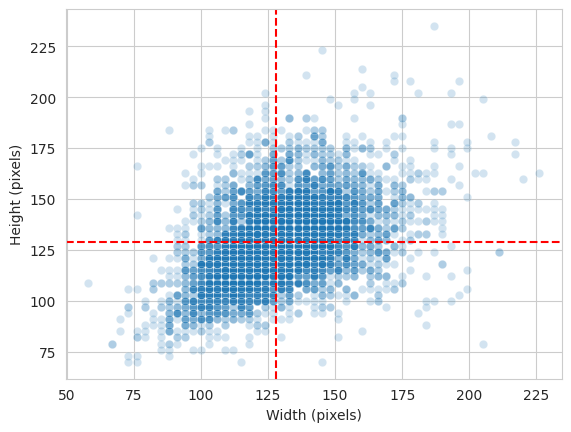

Width average: 129 
Height average: 128


In [8]:
dim1, dim2 = [], []
for label in labels:
    for image_filename in os.listdir(train_path + '/' + label):
        img = imread(train_path + '/' + label + '/' + image_filename)
        d1, d2, colors = img.shape
        dim1.append(d1)  # image height
        dim2.append(d2)  # image width

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='r', linestyle='--')
axes.axhline(y=dim2_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")





# dim1 and dim2 are initialized as empty lists. These lists will be used to store the dimensions (height and width) of the images.
# The code then iterates over each label in the labels list. labels represents the different class labels or categories for the images.
# Within the inner loop, the code iterates over each image_filename in the directory specified by train_path + '/' + label. It assumes that train_path contains the path to the training data directory.
# For each image, it uses imread() to read the image file from the specified path: train_path + '/' + label + '/' + image_filename. It assumes that imread() is a function or method that can read and load the image data.
# After loading the image, it retrieves the shape of the image using img.shape. This returns a tuple containing the dimensions of the image, represented as (height, width, colors). It assigns the height (d1), width (d2), and color channels (colors) to the respective variables.
# The height and width (d1 and d2) of the image are appended to the dim1 and dim2 lists, respectively. This is done to collect the height and width values of all the images for later analysis.
# Next, the code sets the style of the seaborn plot to "whitegrid" using sns.set_style("whitegrid"). This determines the visual style of the scatter plot.
# It creates a scatter plot using sns.scatterplot() from the seaborn library. The x-axis represents the width (dim2 values), and the y-axis represents the height (dim1 values) of the images. The alpha parameter sets the transparency of the scatter plot markers.
# The x-axis label is set to "Width (pixels)" using axes.set_xlabel(), and the y-axis label is set to "Height (pixels)" using axes.set_ylabel().
# The average values for dim1 and dim2 are calculated using np.array(dim1).mean() and np.array(dim2).mean(), respectively. These average values represent the mean height and width of the images.
# Vertical and horizontal lines are added to the plot using axes.axvline() and axes.axhline(), respectively. These lines represent the average height and width values and are visualized with a red dashed line.
# The plot is displayed using plt.show().
# Finally, the code prints the average width and height values using print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}").
# In summary, this code block iterates over the images in the training set, collects their dimensions, and then creates a scatter plot to visualize the distribution of image sizes. It also calculates the average width and height values of the images and displays them.

Images size for training the model is the average from all images in the train set.

In [9]:
image_shape = (dim1_mean, dim2_mean, 3)
image_shape

(128, 129, 3)

Save the image shape embeddings

In [10]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")
# The code joblib.dump(value=image_shape, filename=f"{file_path}/image_shape.pkl") is used to serialize and save the value of the image_shape variable to a file.
# joblib.dump(): This function is provided by the joblib module. It is used for efficient serialization (also known as pickling) of Python objects.
# value=image_shape: The image_shape variable represents the value that you want to save to a file. It could be any Python object, such as a list, dictionary, or a custom data structure. The specific value to be saved depends on how image_shape is defined elsewhere in your code.
# filename=f"{file_path}/image_shape.pkl": This specifies the filename and the path where the serialized object will be saved. The file_path variable represents the directory path where you want to save the file. The filename is set to image_shape.pkl, where the .pkl extension is commonly used for pickle files.
# By executing joblib.dump(value=image_shape, filename=f"{file_path}/image_shape.pkl"), the image_shape value is serialized and saved to the specified file location using the pickle format.
# Serializing objects allows you to store them as binary files, which can be easily loaded and reconstructed later. This can be useful for saving data, model parameters, or any other information that you want to persist beyond the current execution of your code.

['outputs/v1/image_shape.pkl']

---

## Average and variability of images  per label

### Function to load images in an array (tensor)

In [23]:
from tensorflow.keras.preprocessing import image


def load_image_as_array(my_data_dir, new_size=(50, 50), n_images_per_label=20):

    X, y = np.array([], dtype='int'), np.array([], dtype='object')
    labels = os.listdir(my_data_dir)

    for label in labels:
        counter = 0
        for image_filename in os.listdir(my_data_dir + '/' + label):
            # n_images_per_label: we set a limit, since it may take too much time
            if counter < n_images_per_label:

                img = image.load_img(
                    my_data_dir + '/' + label + '/' + image_filename, target_size=new_size)
                if image.img_to_array(img).max() > 1:
                    img_resized = image.img_to_array(img) / 255
                else:
                    img_resized = image.img_to_array(img)

                X = np.append(X, img_resized).reshape(-1,
                                                      new_size[0], new_size[1], img_resized.shape[2])
                y = np.append(y, label)
                counter += 1

    return X, y


# The function load_image_as_array is designed to load image files from a specified directory and convert them into NumPy arrays for further processing or analysis. Here's a breakdown of what the function does:

# 1. The function takes three parameters:
    # my_data_dir: The directory path where the image files are located.
    # new_size: A tuple specifying the desired size to resize the images. The default is set to (50, 50), indicating that the images should be resized to a width and             height of 50 pixels.
    # n_images_per_label: The maximum number of images to load per label. This is used to limit the number of images processed, in case the dataset is too large or for           efficiency purposes.
# 2. X and y are initialized as empty NumPy arrays. X will store the image data, and y will store the corresponding labels.
# 3. It retrieves the list of labels (folder names) within the my_data_dir directory using os.listdir().
# 4. The function then iterates over each label in the labels list.
# 5. Within the inner loop, it iterates over each image_filename in the directory specified by my_data_dir + '/' + label.
# 6. It checks if the counter is less than n_images_per_label to ensure that the maximum number of images per label is not exceeded.
# 7. If the condition is met, it loads the image using image.load_img(). The image is loaded from the path specified by my_data_dir + '/' + label + '/' + image_filename, and it is resized to the dimensions specified by target_size=new_size.
# 8. The function then checks if the maximum pixel value in the image is greater than 1. If it is, it normalizes the pixel values by dividing by 255. This step assumes that the image has pixel values in the range of 0-255.
# 9. The image is converted to a NumPy array using image.img_to_array(), and the resized image data is assigned to img_resized.
# 10. The img_resized array is appended to the X array, reshaped to have dimensions (-1, new_size[0], new_size[1], img_resized.shape[2]). This ensures that the X array can accommodate the new image data.
# 11. The label (label) is appended to the y array.
# 12. The counter is incremented to keep track of the number of images processed for the current label.
# 13. The process continues until the maximum number of images per label (n_images_per_label) is reached.
# 14. Finally, the function returns the X array containing the image data as NumPy arrays and the y array containing the corresponding labels.

# In summary, the load_image_as_array function loads image files from a specified directory, resizes them, converts them to NumPy arrays, and stores them in X. It also collects the corresponding labels and stores them in y. This function can be useful for preparing image data for tasks such as machine learning or computer vision applications.








### Load image shapes and labels in an array

In [24]:
X, y = load_image_as_array(my_data_dir=train_path,
                           new_size=image_shape,
                           n_images_per_label=30)
print(X.shape, y.shape)


(60, 128, 129, 3) (60,)


### Plot and save mean and variability of images per label

In [25]:
def plot_mean_variability_per_labels(X, y, figsize=(12, 5), save_image=False):
    """
    The pseudo-code for the function is:
    * Loop over all labels
    * Subset an array for a given label
    * Calculate the mean and standard deviation
    * Create a figure displaying the mean and variability of images
    * Save the image
    """

    for label_to_display in np.unique(y):
        sns.set_style("white")

        y = y.reshape(-1, 1, 1)
        boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
        arr = X[boolean_mask]

        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis=0)
        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f"Average image for label {label_to_display}")
        axes[0].imshow(avg_img, cmap='gray')
        axes[1].set_title(f"Variability image for label {label_to_display}")
        axes[1].imshow(std_img, cmap='gray')

        if save_image:
            plt.savefig(f"{file_path}/avg_var_{label_to_display}.png",
                        bbox_inches='tight', dpi=150)
        else:
            plt.tight_layout()
            plt.show()
            print("\n")


# The function plot_mean_variability_per_labels is designed to plot and display the mean and variability of images for each label in a given dataset. Here's an explanation of what the function does and why it can be useful:

# 1. The function takes four parameters:
    # X: The NumPy array containing the image data.
    # y: The NumPy array containing the corresponding labels for the images.
    # figsize: The size of the figure for displaying the images. The default is set to (12, 5).
    # save_image: A boolean parameter indicating whether to save the plotted images as image files. The default is set to False.
# 2. The function begins by looping over each unique label in y.
# 3. It sets the seaborn style to "white" using sns.set_style("white").
# 4. It reshapes y to have dimensions (-1, 1, 1) to match the shape of X.
# 5. It creates a boolean mask (boolean_mask) to subset X and select the image data corresponding to the current label.
# 6. It calculates the average image (avg_img) and the standard deviation image (std_img) for the selected subset of images (arr) using np.mean() and np.std() with axis=0.
# 7. It prints the label information and the shape of the average image (avg_img) using print() statements.
# 8. It creates a figure with two subplots (fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)). The first subplot displays the average image (avg_img) with a         title indicating the label, and the second subplot displays the variability image (std_img) with a similar title.
# 9. If save_image is set to True, it saves the plotted images as image files. The filenames include the label information and are saved in the directory specified by          file_path. The saved images are in PNG format with a DPI of 150.
# 10. If save_image is False, the images are displayed using plt.tight_layout() to ensure proper spacing and then shown using plt.show(). After displaying the images, a        newline character is printed for separation.

# In summary, the plot_mean_variability_per_labels function iterates over each label in the dataset, calculates the average and variability images, and displays or saves # them as plots. This function can be useful for visualizing and understanding the mean and variability of images across different labels, providing insights into the dataset's characteristics and helping with data analysis or model interpretation.


==== Label Parasitized ====
Image Shape: (128, 129, 3)
==== Label Uninfected ====
Image Shape: (128, 129, 3)


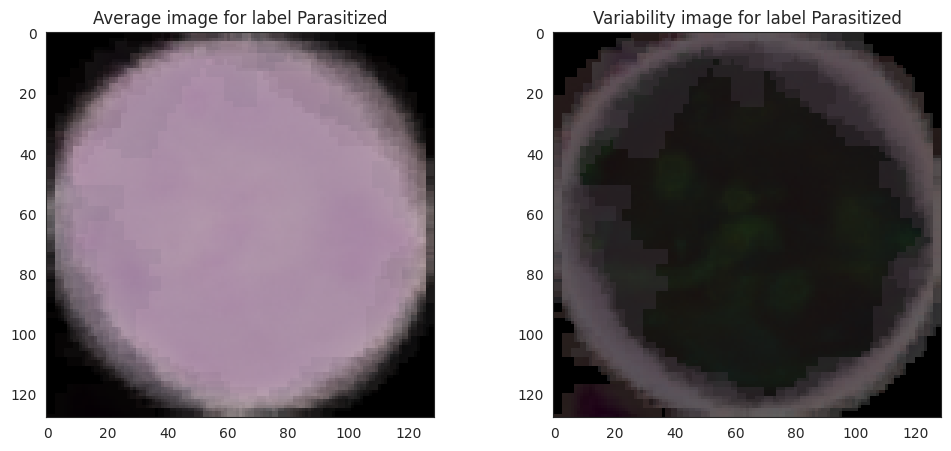

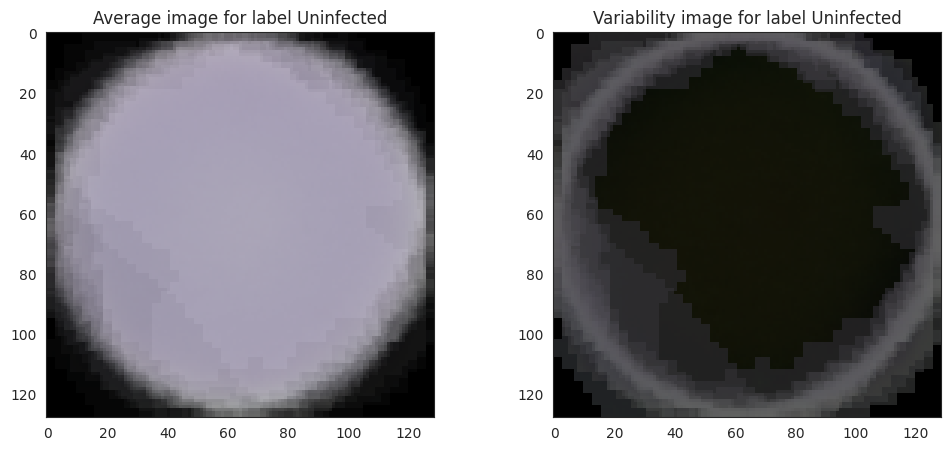

In [26]:
plot_mean_variability_per_labels(X=X, y=y, figsize=(12, 5), save_image=True)


---

## Difference between average parasite-contained and average uninfected cell images

---

In [27]:
def subset_image_label(X, y, label_to_display):
    y = y.reshape(-1, 1, 1)
    boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
    df = X[boolean_mask]
    return df

# subset_image_label function:
# 1. This function takes three parameters: X (the image data as a NumPy array), y (the corresponding labels as a NumPy array), and label_to_display (the label for which to subset the data). It reshapes y to have dimensions (-1, 1, 1) to match the shape of X.
# 2. It creates a boolean mask (boolean_mask) to subset X and select the image data corresponding to the label_to_display.
# 3. It assigns the subset of image data to the variable df.
# 4. Finally, it returns df, which contains the subset of image data for the specified label.

def diff_bet_avg_image_labels_data_as_array(X, y, label_1, label_2, figsize=(20, 5), save_image=False):
    """
    Checks if the labels exist in the set of unique labels
    Calculates the mean and difference for label1 and label2
    Plots a chart and saves it if save_image=True
    """
    sns.set_style("white")

    if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
        print(
            f"Either label {label} or label {label_2}, are not in {np.unique(y)} ")
        return

    # calculate mean from label1
    images_label = subset_image_label(X, y, label_1)
    label1_avg = np.mean(images_label, axis=0)

    # calculate mean from label2
    images_label = subset_image_label(X, y, label_2)
    label2_avg = np.mean(images_label, axis=0)

    # calculate difference and plot difference, avg label1 and avg label2
    difference_mean = label1_avg - label2_avg
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    axes[0].imshow(label1_avg, cmap='gray')
    axes[0].set_title(f'Average {label_1}')
    axes[1].imshow(label2_avg, cmap='gray')
    axes[1].set_title(f'Average {label_2}')
    axes[2].imshow(difference_mean, cmap='gray')
    axes[2].set_title(f'Difference image: Avg {label_1} & {label_2}')
    if save_image:
        plt.savefig(f"{file_path}/avg_diff.png", bbox_inches='tight', dpi=150)
    else:
        plt.tight_layout()
        plt.show()

# diff_bet_avg_image_labels_data_as_array function:

# 1. This function takes five parameters: X (the image data as a NumPy array), y (the corresponding labels as a NumPy array), label_1 (the first label for comparison),         label_2 (the second label for comparison), figsize (the size of the figure for displaying the images), and save_image (a boolean parameter indicating whether to save       the plotted images as image files).
# 2. It sets the seaborn style to "white" using sns.set_style("white").
# 3. It checks if label_1 and label_2 are present in the set of unique labels in y. If either label is not present, it prints a message indicating that one or both labels      are not found in np.unique(y) and returns.
# 4. It calculates the average image (label1_avg) for label_1 and the average image (label2_avg) for label_2 by calling the subset_image_label function for each label and      then taking the mean of the resulting image subset.
# 5. It calculates the difference between the two average images (label1_avg and label2_avg) and assigns it to difference_mean.
# 6. It creates a figure with three subplots (fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)). The first two subplots display the average images for label_1       and label_2, respectively, with corresponding titles. The third subplot displays the difference image (difference_mean) with a title indicating the labels being            compared.
# 7. If save_image is set to True, it saves the plotted images as a single image file with the filename avg_diff.png in the directory specified by file_path. The saved i       image has a DPI of 150.
# 8. If save_image is False, the images are displayed using plt.tight_layout() to ensure proper spacing, and then shown using plt.show().

# In summary, the diff_bet_avg_image_labels_data_as_array function compares the average images for two specified labels by calculating the mean image for each label, computing the difference between them, and displaying the average images and the difference image in a figure. The subset_image_label function is a helper function that subsets the image data based on a specific label. These functions can be useful for visualizing and comparing average images between different labels in a dataset, aiding in understanding the differences and similarities between them.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


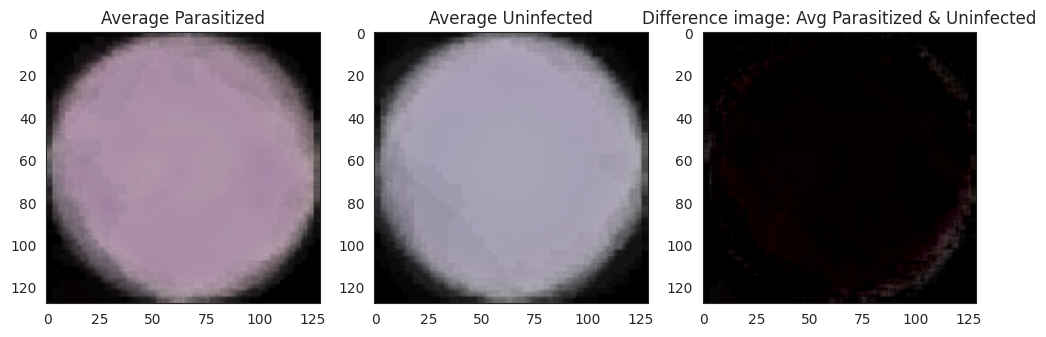

In [28]:
diff_bet_avg_image_labels_data_as_array(X=X, y=y,
                                        label_1='Parasitized', label_2='Uninfected',
                                        figsize=(12, 10),
                                        save_image=True
                                        )


---

## Image Montage

In [29]:
import itertools
import random
sns.set_style("white")


def image_montage(dir_path, label_to_display, nrows, ncols, figsize=(15, 10)):
    """
    if the label exists in the directory
    check if your montage space is greater than the subset size
    create a list of axes indices based on nrows and ncols
    create a Figure and display images
    in this loop, load and plot the given image
    """

    labels = os.listdir(dir_path)

    # subset the class you are interested to display
    if label_to_display in labels:

        # checks if your montage space is greater than the subset size
        images_list = os.listdir(dir_path + '/' + label_to_display)
        if nrows * ncols < len(images_list):
            img_idx = random.sample(images_list, nrows * ncols)
        else:
            print(
                f"Decrease nrows or ncols to create your montage. \n"
                f"There are {len(images_list)} in your subset. "
                f"You requested a montage with {nrows * ncols} spaces")
            return

        # create a list of axes indices based on nrows and ncols
        list_rows = range(0, nrows)
        list_cols = range(0, ncols)
        plot_idx = list(itertools.product(list_rows, list_cols))

        # create a Figure and display images
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
        for x in range(0, nrows*ncols):
            img = imread(dir_path + '/' + label_to_display + '/' + img_idx[x])
            img_shape = img.shape
            axes[plot_idx[x][0], plot_idx[x][1]].imshow(img)
            axes[plot_idx[x][0], plot_idx[x][1]].set_title(
                f"Width {img_shape[1]}px x Height {img_shape[0]}px")
            axes[plot_idx[x][0], plot_idx[x][1]].set_xticks([])
            axes[plot_idx[x][0], plot_idx[x][1]].set_yticks([])
        plt.tight_layout()
        plt.show()

    else:
        print("The label you selected doesn't exist.")
        print(f"The existing options are: {labels}")

# The code provided defines a function named `image_montage`. This function is responsible for creating a montage of images from a specified directory for a specific label. Let's go through the code and understand its purpose:

# 1. It imports the necessary modules: `itertools`, `random`, and sets the seaborn style to "white" using `sns.set_style("white")`.
# 2. The function `image_montage` takes five parameters:
  # - `dir_path`: The directory path where the image files are located.
  # - `label_to_display`: The label (class) for which the montage of images will be created.
  # - `nrows`: The number of rows in the montage grid.
  # - `ncols`: The number of columns in the montage grid.
  # - `figsize`: The size of the figure for displaying the montage. The default is set to (15, 10).
# 3. It retrieves the list of labels (folder names) within the `dir_path` directory using `os.listdir()`.
# 4. It checks if the `label_to_display` exists in the list of labels. If it does, the code proceeds with creating the montage for that label. If not, it prints a message      indicating that the selected label doesn't exist and displays the available options.
# 5. It checks if the number of spaces in the montage (`nrows * ncols`) is greater than the number of images available for the specified label. If there are more spaces        than images, it prints a message indicating that the montage size needs to be decreased. It then returns without creating the montage.
# 6. If the montage size is valid, it randomly samples `nrows * ncols` image filenames from the directory for the specified label.
# 7. It creates a list of axes indices based on `nrows` and `ncols` using `itertools.product()` and assigns it to `plot_idx`. This list will determine the position of each     image in the montage grid.
# 8. It creates a figure with `nrows` rows and `ncols` columns using `plt.subplots()`. This sets up the grid for displaying the images.
# 9. It loops over the indices `x` from 0 to `nrows * ncols`.
# 10. Within the loop, it loads the image using `imread()` from the path specified by `dir_path + '/' + label_to_display + '/' + img_idx[x]`.
# 11. It retrieves the shape of the image using `img.shape` and assigns it to `img_shape`.
# 12. It displays the image in the corresponding subplot using `axes[plot_idx[x][0], plot_idx[x][1]].imshow(img)`.
# 13. It sets the title of the subplot to include the width and height of the image using `axes[plot_idx[x][0], plot_idx[x][1]].set_title()`.
# 14. It removes the x-axis and y-axis ticks using `axes[plot_idx[x][0], plot_idx[x][1]].set_xticks([])` and `axes[plot_idx[x][0], plot_idx[x][1]].set_yticks([])`.
# 15. After looping through all the images, it applies `plt.tight_layout()` to ensure proper spacing between the subplots.
# 16. If the label exists and the montage is created, it displays the montage using `plt.show()`.
# 17. If the selected label doesn't exist, it prints a message indicating the non-existent label and displays the available options.

# In summary, the `image_montage` function creates a montage of images for a specified label. It randomly samples images from the label's directory and displays them in a grid-like arrangement using subplots. This function can be useful for visualizing multiple images from a specific class or label in a compact and organized manner.

Run Montage in all labels

Uninfected


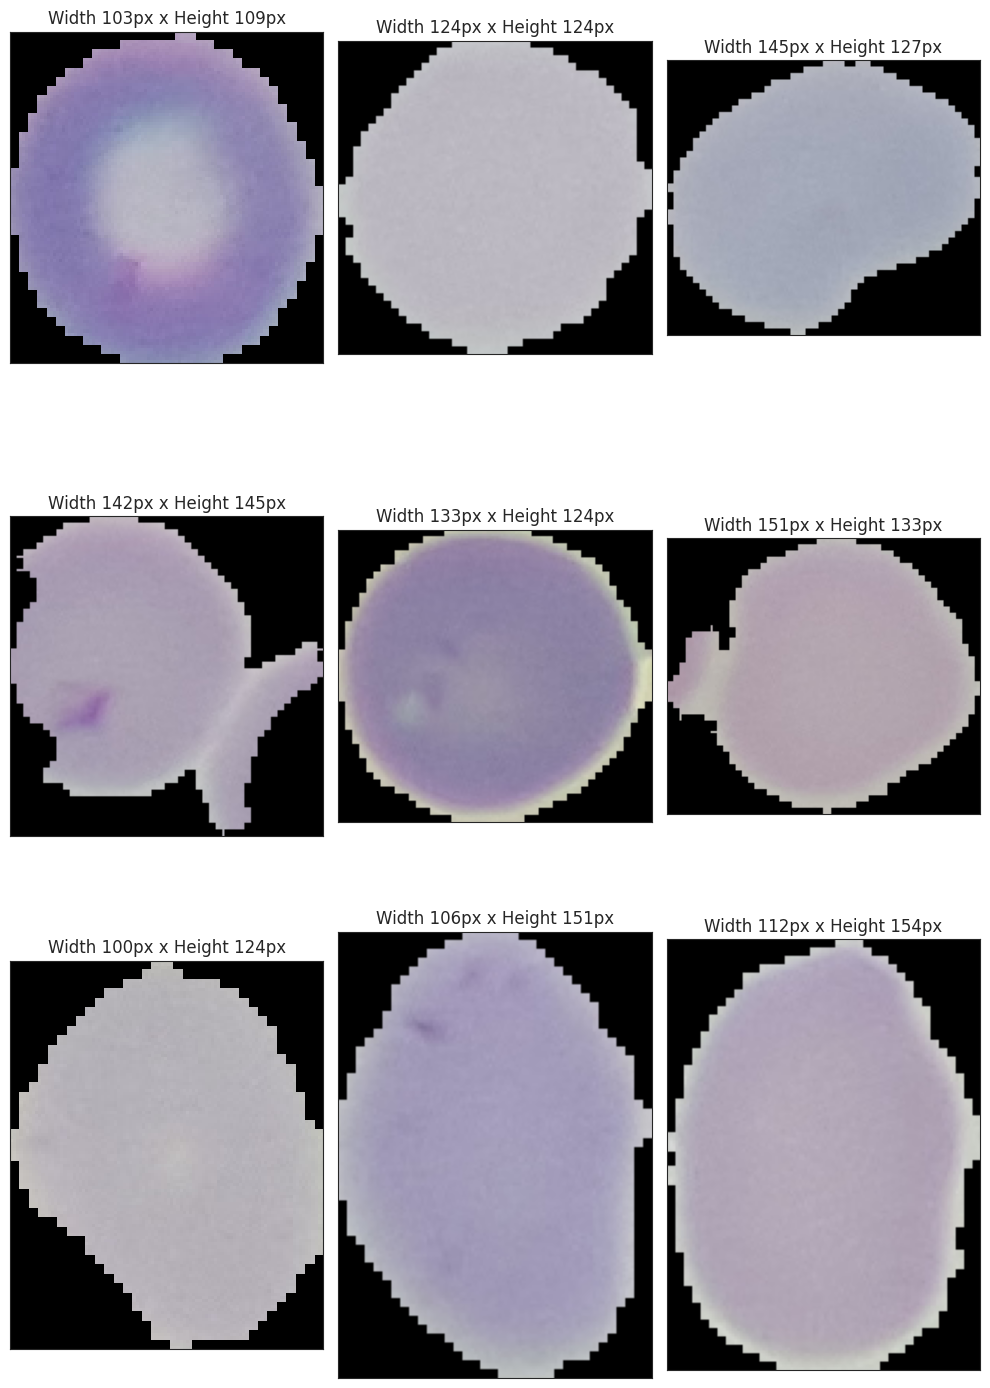



Parasitized


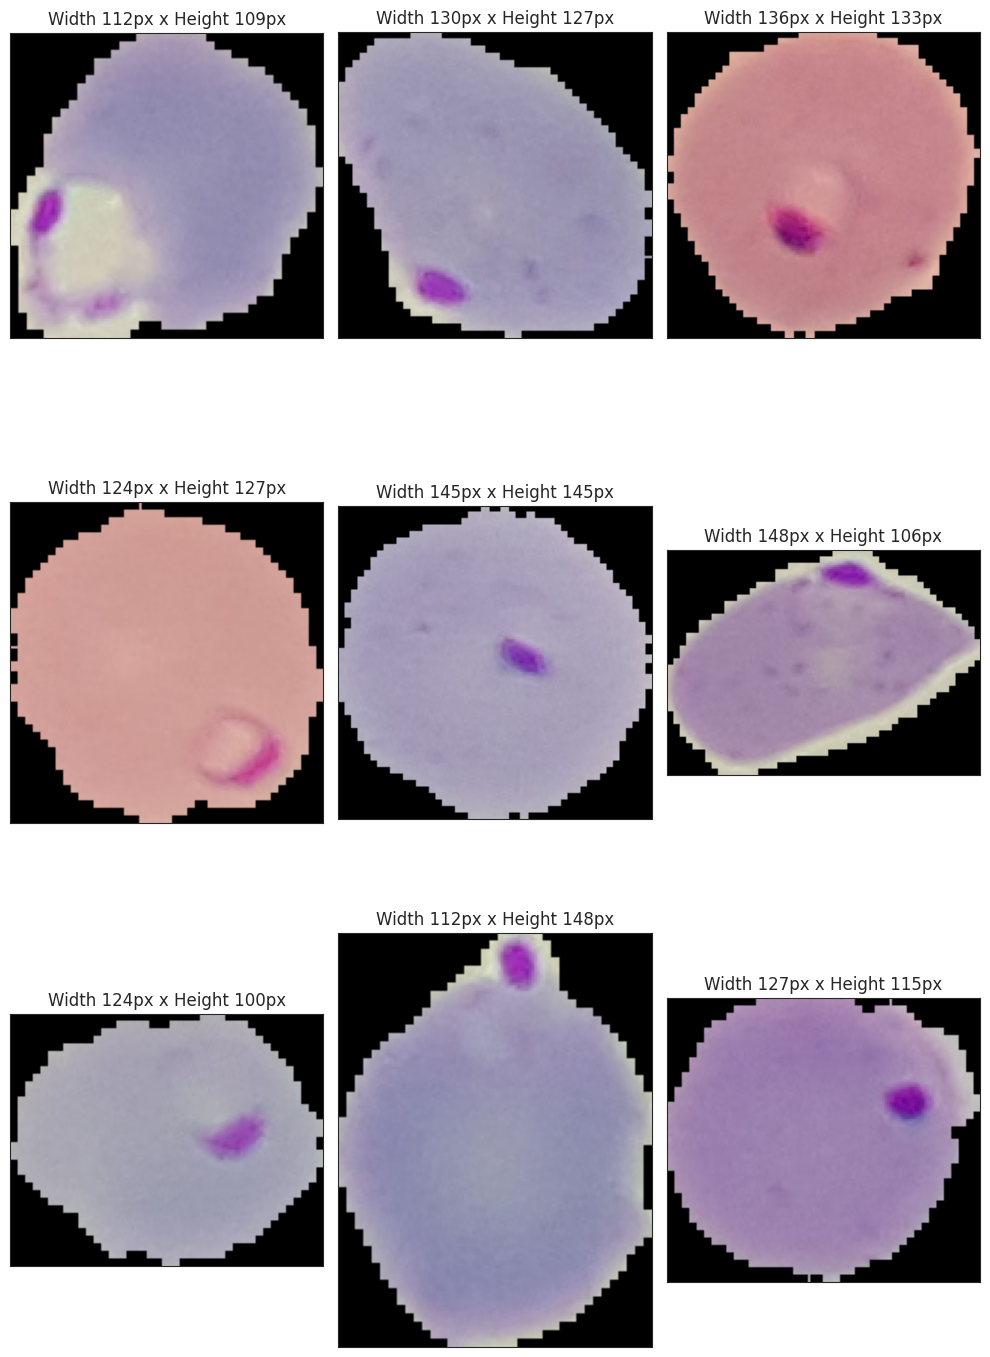

In [30]:
for label in labels:
    print(label)
    image_montage(dir_path=train_path,
                  label_to_display=label,
                  nrows=3, ncols=3,
                  figsize=(10, 15)
                  )
    print("\n")

# The provided code is a loop that iterates over each label in the `labels` list and performs the following actions:

# 1. It prints the current label using `print(label)` to display the label name.

# 2. It calls the `image_montage` function with the following arguments:
   # - `dir_path`: The directory path where the image files are located.
   # - `label_to_display`: The current label being iterated.
   # - `nrows`: The number of rows in the montage grid.
   # - `ncols`: The number of columns in the montage grid.
   # - `figsize`: The size of the figure for displaying the montage.

   # The values for `nrows`, `ncols`, and `figsize` are set to 3, 3, and (10, 15) respectively.

# 3. After calling the `image_montage` function, it prints a newline character (`\n`) to add a line break for separation between the montages of different labels.

# By running this loop, the code generates a montage of images for each label in the `labels` list. It displays the montages in a grid format with 3 rows and 3 columns. The size of the figure for each montage is set to (10, 15). The `image_montage` function is responsible for loading and displaying the images based on the specified label. The loop provides a convenient way to visualize the images of different labels in a compact and organized manner.

---

# Congratulations

---